<a href="https://colab.research.google.com/github/Odomero/Tanzania_Tourism_Prediction/blob/main/Tanz_TourCost_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TANZIANA TOURISM PREDICTION

## INTRODUCTION

Tanzania is a country in East Africa with many tourist attractions.
There are 17 national parks in Tanzania, 29 game reserves, 40 game-controlled areas, marine parks and conservation area.
Tanzania is also home to Mount Kilimanjaro,t he highest mountain in Africa.

Let's predict how much money a tourist will spend when visiting Tanzania using tourism survey data and ML.

<img src="Giraffe_tanz.jpg" style="width:680px;height:380px"/>

## DATA PREPARATION AND ANALYSIS

### Importing Libraries and DataSets

In [2]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [3]:
# Importing Libraries

import numpy as np # for scientific computing
import pandas as pd # for data manipulation, analysis and cleaning
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from matplotlib import style # for data visualization
style.use('ggplot')
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error

print("Done importing libraries...")

Done importing libraries...


In [4]:
#Loading Datasets

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [68]:
train_df = pd.read_csv("/content/drive/MyDrive/Tanzania_Tourism_Prediction/Train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Tanzania_Tourism_Prediction/Test.csv")

In [69]:
#Copying Datasets

train = train_df.copy()
test = test_df.copy()

print("Done copying datasets!!")

Done copying datasets!!


In [70]:
#Merging Datasets

train_df['train']= 1
test_df['train']= 0
dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


### Data Exploration

In [71]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [72]:
# a glimpse of the training dataset (viewing the first 5 rows)

train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,train
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,1
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,1
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1


In [73]:
# a glimpse of the test dataset (viewing the last 5 rows)

test_df.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,train
1596,tour_988,UNITED STATES OF AMERICA,25-44,NaN,0.0,1.0,Meetings and Conference,Mountain climbing,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,1,0,Cash,No,NaN,0
1597,tour_990,ITALY,45-64,Spouse and Children,3.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,No,Yes,Yes,Yes,Yes,No,No,10,5,Other,Yes,Wildlife,0
1598,tour_992,FINLAND,25-44,Alone,0.0,1.0,Meetings and Conference,Mountain climbing,"Friends, relatives",Independent,No,No,No,No,No,No,No,6,0,Cash,Yes,No comments,0
1599,tour_996,SOUTH AFRICA,24-Jan,Alone,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,4,0,Cash,Yes,Wildlife,0
1600,tour_998,SOUTH AFRICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Cultural tourism,"Radio, TV, Web",Independent,No,No,No,No,No,No,No,9,5,Cash,Yes,Friendly People,0


In [74]:
#Dataset Size

print(f"Train_df has {train_df.shape[0]} rows and {train_df.shape[1]} columns.\nTest_df has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

Train_df has 4809 rows and 24 columns.
Test_df has 1601 rows and 23 columns.


In [12]:
#Dataset Summary

def datasum(df):
    '''
    This function generates a DataFrame that summarises
    the dataset showing the columns,data types, number 
    of missing values, number of unique values, first 
    and second value.
    '''
    print(f"Dataset size: {df.shape}")
    sumr = pd.DataFrame(df.dtypes, columns=["dtypes"])
    sumr = sumr.reset_index()
    sumr['Name'] = sumr['index']
    sumr = sumr[['Name','dtypes']]
    sumr['Missing'] = df.isnull().sum().values
    sumr['Unique'] = df.nunique().values
    sumr['First_Value'] = df.loc[0].values
    sumr['Second_Value'] = df.loc[1].values
   
    return sumr

In [13]:
view_sum = datasum(train_df)
view_sum

Dataset size: (4809, 24)


,Name,dtypes,Missing,Unique,First_Value,Second_Value
0,ID,object,0,4809,tour_0,tour_10
1,country,object,0,105,SWIZERLAND,UNITED KINGDOM
2,age_group,object,0,4,45-64,25-44
3,travel_with,object,1114,5,Friends/Relatives,NaN
4,total_female,float64,3,14,1,1
5,total_male,float64,5,14,1,0
6,purpose,object,0,7,Leisure and Holidays,Leisure and Holidays
7,main_activity,object,0,9,Wildlife tourism,Cultural tourism
8,info_source,object,0,8,"Friends, relatives",others
9,tour_arrangement,object,0,2,Independent,Independent


In [14]:
view_sumr = datasum(test_df)
view_sumr

Dataset size: (1601, 23)


,Name,dtypes,Missing,Unique,First_Value,Second_Value
0,ID,object,0,1601,tour_1,tour_100
1,country,object,0,87,AUSTRALIA,SOUTH AFRICA
2,age_group,object,0,4,45-64,25-44
3,travel_with,object,327,5,Spouse,Friends/Relatives
4,total_female,float64,1,13,1,0
5,total_male,float64,2,10,1,4
6,purpose,object,0,7,Leisure and Holidays,Business
7,main_activity,object,0,9,Wildlife tourism,Wildlife tourism
8,info_source,object,0,8,"Travel, agent, tour operator",Tanzania Mission Abroad
9,tour_arrangement,object,0,2,Package Tour,Package Tour


In [15]:
train_df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost,train
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03,4809.0
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06,1.0
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07,0.0
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04,1.0
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05,1.0
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06,1.0
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06,1.0
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07,1.0


In [75]:
def sumt(df):
    '''
    This function creates a new column
    from the addition of two columns
    '''
    data = df
    data['total']  = data['total_female'] + data['total_male']
    return data

In [76]:
#Handling Missing Values

def dataclean(df):
    '''
    This function handles missing values in 'travel_with'
    column ensuring that family size of 1 is mapped as
    'Alone' in 'travel_with' column.
    '''
    data = df
    missing = data['travel_with'].isna()
    mapping_dict = dict({ 1: 'Alone', 2: 'Spouse'})
    data.loc[missing, 'travel_with'] = data.loc[missing, 'total'].map(mapping_dict)
    return data

In [77]:
train_df = sumt(train_df)
test_df = sumt(test_df)
all_data = sumt(all_data)

In [78]:
train_df = dataclean(train_df)
test_df = dataclean(test_df)
all_data = dataclean(all_data)

In [79]:
def unique_val(df):
    '''
    This function retrieves unique values
    '''
    data = df
    cols = ['country', 'age_group', 'travel_with',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'payment_mode',
       'first_trip_tz']
    dic_uni = {}
    for col in cols:
        dic_uni[col] = dic_uni.get(col,data[col].unique())
    return dic_uni

In [21]:
unique_val(train_df)

{'age_group': array(['45-64', '25-44', '1-24', '65+'], dtype=object),
 'country': array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
        'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
        'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
        'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
        'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
        'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
        'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
        'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
        'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
        'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
        'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
        'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
        'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
        '

In [22]:
unique_val(test_df)

{'age_group': array(['45-64', '25-44', '24-Jan', '65+'], dtype=object),
 'country': array(['AUSTRALIA', 'SOUTH AFRICA', 'GERMANY', 'CANADA', 'UNITED KINGDOM',
        'DENMARK', 'RUSSIA', 'FRANCE', 'SPAIN', 'SWIZERLAND',
        'UNITED STATES OF AMERICA', 'CHINA', 'INDIA', 'ZAMBIA',
        'NEW ZEALAND', 'COMORO', 'NETHERLANDS', 'MALAYSIA', 'KENYA',
        'ITALY', 'FINLAND', 'MALAWI', 'BELGIUM', 'NORWAY', 'MALT',
        'ETHIOPIA', 'OMAN', 'CZECH REPUBLIC', 'GHANA', 'UAE', 'PORTUGAL',
        'SINGAPORE', 'SWEDEN', 'UGANDA', 'BRAZIL', 'QATAR', 'UKRAIN',
        'ROMANIA', 'DRC', 'HUNGARY', 'RWANDA', 'AUSTRIA', 'BOTSWANA',
        'ZIMBABWE', 'IRELAND', 'JAPAN', 'IRAN', 'MOZAMBIQUE', 'SWAZILAND',
        'BULGARIA', 'ISRAEL', 'CHILE', 'SUDAN', 'BANGLADESH', 'SLOVAKIA',
        'COSTARICA', 'NAMIBIA', 'POLAND', 'DOMINICA', 'SCOTLAND', 'HAITI',
        'PAKISTAN', 'TAIWAN', 'PHILIPINES', 'VIETNAM', 'SERBIA', 'BURUNDI',
        'BOSNIA', 'LIBERIA', 'PERU', 'GREECE', 'INDONESIA', 'LEBA

In [23]:
train_miss = pd.concat([train_df.isnull().sum(), (train_df.isnull().sum() * 100 / len(train_df))], axis = 1,
                        keys = ['Values missing', 'Percent of missing'])
train_miss.loc[train_miss['Values missing'] > 0].sort_values(ascending = False, by = 'Values missing').style.background_gradient('Blues')


,Values missing,Percent of missing
most_impressing,313,6.508630
travel_with,15,0.311915
total,8,0.166355
total_male,5,0.103972
total_female,3,0.062383


In [24]:
test_miss = pd.concat([test_df.isnull().sum(), (test_df.isnull().sum() * 100 / len(test_df))], axis = 1,
                        keys = ['Values missing', 'Percent of missing'])
test_miss.loc[test_miss['Values missing'] > 0].sort_values(ascending = False, by = 'Values missing').style.background_gradient('Blues')


,Values missing,Percent of missing
most_impressing,111,6.933167
travel_with,5,0.312305
total,3,0.187383
total_male,2,0.124922
total_female,1,0.062461


In [80]:
#Handling features not required for Modelling

train_df = train_df.drop(['most_impressing','ID'], axis = 1)
test_df = test_df.drop(['most_impressing','ID'], axis = 1)
all_data = all_data.drop(['most_impressing','ID'], axis = 1)

print('Done removing columns')

Done removing columns


In [81]:
from IPython.display import display

display(all_data[all_data['total'].isnull()])

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,train,total
490,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,9.0,5.0,Cash,Yes,313000.0,1,NaN
545,ITALY,1-24,Friends/Relatives,NaN,4.0,Volunteering,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,15.0,0.0,Cash,Yes,9077320.0,1,NaN
1017,UNITED STATES OF AMERICA,45-64,Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,19.0,0.0,Cash,Yes,7293000.0,1,NaN
1261,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Newspaper, magazines,brochures",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7.0,7.0,Cash,Yes,324300.0,1,NaN
1473,SPAIN,45-64,Friends/Relatives,7.0,NaN,Other,Hunting tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,No,No,Yes,11.0,0.0,Cash,No,56960183.0,1,NaN
2449,SOUTH AFRICA,25-44,Friends/Relatives,0.0,NaN,Meetings and Conference,Wildlife tourism,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,4.0,0.0,Credit Card,Yes,3978000.0,1,NaN
2494,FRANCE,25-44,NaN,0.0,NaN,Leisure and Holidays,Conference tourism,"Radio, TV, Web",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6.0,0.0,Cash,Yes,4309500.0,1,NaN
3984,CHINA,25-44,Friends/Relatives,10.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4.0,2.0,Cash,Yes,89505000.0,1,NaN
54,GERMANY,45-64,Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,23.0,0.0,Cash,No,NaN,0,NaN
511,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,No,No,Yes,No,9.0,5.0,Cash,Yes,NaN,0,NaN


In [82]:
all_data[['travel_with','total_female']].groupby(['travel_with'])['total_female'].max()

travel_with
Alone                  12.0
Children               49.0
Friends/Relatives      20.0
Spouse                 11.0
Spouse and Children     7.0
Name: total_female, dtype: float64

In [83]:
#Handling Missing Values

def data_prep(dataset):
    '''
    this function handles missing data for both train and test dataset
    '''

    clean_df = dataset
    
    clean_df['travel_with'].fillna('Friends/Relatives', inplace=True)

    # replace missing females by the mean of females who belong to the same group of travel_with
    clean_df['total_female'] = clean_df.groupby(['travel_with'])['total_female'].transform(lambda x: x.fillna(round(x.mean(),0)))   
    
    # replace missing males by the mean of males who belong to the same group of travel_with
    clean_df['total_male'] = clean_df.groupby(['travel_with'])['total_male'].transform(lambda x: x.fillna(round(x.mean(),0))) 
    
    return clean_df

In [84]:
train_df = data_prep(train_df)
test_df = data_prep(test_df)
all_data = data_prep(all_data)

In [85]:
train_df.isnull().sum()

country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
total_cost               0
train                    0
total                    8
dtype: int64

In [86]:
# Cleaning up the travel_with feature of the test dataset

all_data.loc[((all_data['total_female'] == 11) & (all_data['travel_with'] == 'Spouse')), 'total_female'] = 1

In [87]:
train_df[['travel_with','total_female']].groupby(['travel_with'])['total_female'].max()

travel_with
Alone                  12.0
Children               49.0
Friends/Relatives      15.0
Spouse                 11.0
Spouse and Children     7.0
Name: total_female, dtype: float64

In [88]:
train_df[(train_df['total'] > 2) & (train_df['travel_with'] == 'Spouse')]

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,train,total
442,UNITED KINGDOM,1-24,Spouse,2.0,2.0,Visiting Friends and Relatives,Beach tourism,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,0.0,60.0,Cash,No,200000.00,1,4.0
504,BELGIUM,65+,Spouse,11.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,No,No,No,14.0,0.0,Cash,Yes,7715722.00,1,12.0
1413,FRANCE,45-64,Spouse,1.0,2.0,Visiting Friends and Relatives,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,9.0,5.0,Cash,Yes,9945000.00,1,3.0
1483,FRANCE,25-44,Spouse,1.0,2.0,Leisure and Holidays,Bird watching,"Travel, agent, tour operator",Package Tour,Yes,No,No,No,No,No,No,9.0,3.0,Cash,Yes,1657500.00,1,3.0
1787,SPAIN,45-64,Spouse,2.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,13.0,0.0,Cash,Yes,745875.00,1,3.0
2583,ITALY,25-44,Spouse,4.0,3.0,Leisure and Holidays,Beach tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,No,No,No,No,0.0,14.0,Cash,Yes,42775102.50,1,7.0
2648,KENYA,25-44,Spouse,1.0,2.0,Visiting Friends and Relatives,Hunting tourism,others,Independent,No,No,No,No,No,No,No,3.0,0.0,Cash,No,275495.22,1,3.0
2693,SPAIN,45-64,Spouse,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,No,No,4.0,3.0,Cash,Yes,15885310.00,1,4.0
3559,ZIMBABWE,45-64,Spouse,2.0,1.0,Other,Hunting tourism,Tanzania Mission Abroad,Independent,No,No,No,No,No,No,No,3.0,0.0,Cash,Yes,1494200.00,1,3.0
3693,FRANCE,25-44,Spouse,2.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,10.0,11.0,Cash,Yes,19890000.00,1,3.0


In [89]:
all_data.loc[((all_data['total_female'] > 2) & (all_data['total_male'] > 2) & (all_data['travel_with'] == 'Spouse')), 'travel_with'] = "Spouse and Children"

In [35]:
all_data[['travel_with','total_female']].groupby(['travel_with'])['total_female'].max()

travel_with
Alone                  12.0
Children               49.0
Friends/Relatives      20.0
Spouse                  2.0
Spouse and Children     7.0
Name: total_female, dtype: float64

In [90]:
all_data[((all_data['total_female'] > 2) & (all_data['total_male'] > 2) & (all_data['travel_with'] == 'Spouse'))]

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,train,total


In [91]:
all_data.loc[(all_data['total'] > 1) & (all_data['travel_with'] == 'Alone'),'travel_with']="Friends/Relatives"

In [92]:
all_data.loc[(all_data['total_female'] == 1)& (all_data['total_male'] == 0) & (all_data['travel_with'] == 'Spouse'), 'total_male']= 1

In [93]:
all_data.loc[(all_data['total_female'] == 0)& (all_data['total_male'] == 1) & (all_data['travel_with'] == 'Spouse'), 'total_female']= 1

In [94]:
all_data[(all_data['total'] == 1) & (all_data['travel_with'] != 'Alone')  & (all_data['travel_with'] != 'Spouse')]

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,train,total
526,FRANCE,45-64,Friends/Relatives,0.0,1.0,Leisure and Holidays,Diving and Sport Fishing,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,9.0,0.0,Cash,Yes,1657500.0,1,1.0
828,UNITED KINGDOM,1-24,Friends/Relatives,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,12.0,0.0,Cash,Yes,25194000.0,1,1.0
1086,JAPAN,25-44,Friends/Relatives,0.0,1.0,Meetings and Conference,Wildlife tourism,Trade fair,Independent,No,No,No,No,No,No,No,2.0,0.0,Cash,Yes,248625.0,1,1.0
1116,UNITED STATES OF AMERICA,25-44,Friends/Relatives,1.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,10.0,5.0,Cash,No,900000.0,1,1.0
1200,DENMARK,1-24,Friends/Relatives,1.0,0.0,Leisure and Holidays,Conference tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,No,Yes,Yes,10.0,6.0,Cash,Yes,76742250.0,1,1.0
1565,NORWAY,25-44,Friends/Relatives,1.0,0.0,Meetings and Conference,Wildlife tourism,"Newspaper, magazines,brochures",Independent,No,No,No,No,No,No,No,5.0,0.0,Credit Card,Yes,2734875.0,1,1.0
1783,UNITED STATES OF AMERICA,65+,Children,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10.0,0.0,Credit Card,Yes,8287500.0,1,1.0
2343,ZIMBABWE,25-44,Friends/Relatives,0.0,1.0,Other,Hunting tourism,others,Independent,No,No,No,No,No,No,No,1.0,0.0,Cash,No,497250.0,1,1.0
3180,FRANCE,25-44,Friends/Relatives,0.0,1.0,Leisure and Holidays,Conference tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,No,No,No,No,0.0,0.0,Cash,Yes,6795750.0,1,1.0
3451,ZAMBIA,45-64,Friends/Relatives,0.0,1.0,Business,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,3.0,0.0,Cash,No,50000.0,1,1.0


In [41]:
all_data[['travel_with','total_male']].groupby(['travel_with'])['total_male'].mean()

travel_with
Alone                  0.612378
Children               1.534562
Friends/Relatives      1.639871
Spouse                 1.005755
Spouse and Children    1.865031
Name: total_male, dtype: float64

In [42]:
all_data[['travel_with','total_female']].groupby(['travel_with'])['total_female'].mean()

travel_with
Alone                  0.386319
Children               1.557604
Friends/Relatives      1.652733
Spouse                 1.002878
Spouse and Children    1.977505
Name: total_female, dtype: float64

In [95]:
all_data.loc[(all_data['total_female'] == 0) & (all_data['travel_with']=='Friends/Relatives')&(all_data['total_male'] == 1),'total_female'] = 2

In [96]:
all_data.loc[(all_data['total_female'] == 1) & (all_data['travel_with']=='Friends/Relatives')&(all_data['total_male'] == 0),'total_male'] = 2

In [97]:
all_data.loc[(all_data['total_female'] == 0) & (all_data['travel_with']=='Children')&(all_data['total_male'] == 1),'total_female'] = 2

In [98]:
# Cleaning up the age_group feature of the test dataset
all_data['age_group'].replace({'24-Jan':'1-24'}, inplace=True)

In [99]:
all_data['age_group'].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [100]:
#Handling features not required for Modelling

all_data = all_data.drop(['total'],axis = 1)

print('Done removing total column')

Done removing total column


In [49]:
all_data.isnull().sum()

country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
total_cost               1601
train                       0
dtype: int64

In [101]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

### Data Visualization

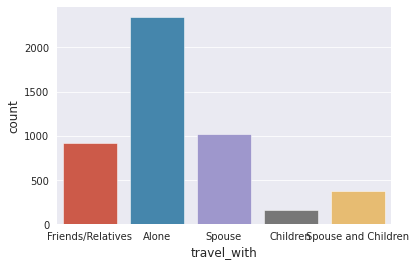

In [51]:
sns.countplot(x="travel_with", data=train_df)

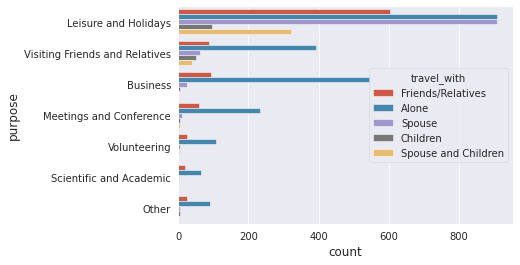

In [52]:
sns.countplot(y="purpose", hue='travel_with', data=train_df)
plt.show()

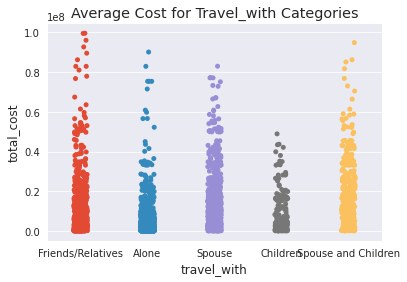

In [53]:
sns.stripplot(x='travel_with', y= 'total_cost', data=train_df)
plt.title('Average Cost for Travel_with Categories')
plt.show()

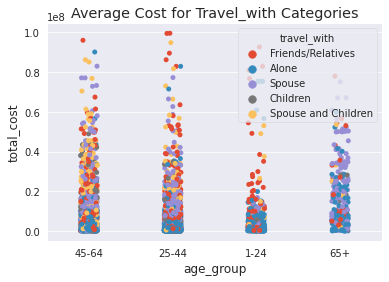

In [54]:
sns.stripplot(x='age_group', y= 'total_cost',hue='travel_with', data=train_df)
plt.title('Average Cost for Travel_with Categories')
plt.show()

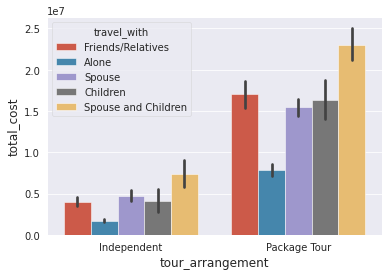

In [55]:
sns.barplot(x="tour_arrangement", y="total_cost",hue='travel_with', data=train_df)
plt.show()

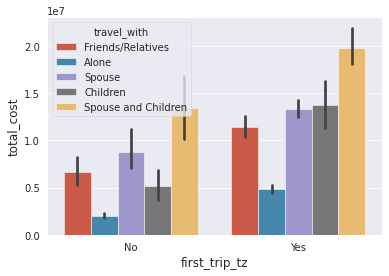

In [56]:
sns.barplot(x="first_trip_tz", y="total_cost",hue='travel_with', data=train_df)
plt.show()

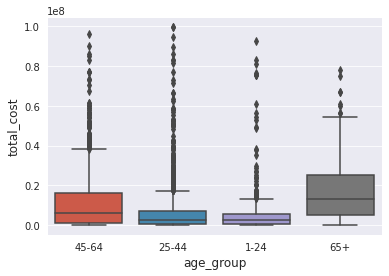

In [57]:
sns.boxplot(x="age_group", y="total_cost", data=train_df)
plt.show()

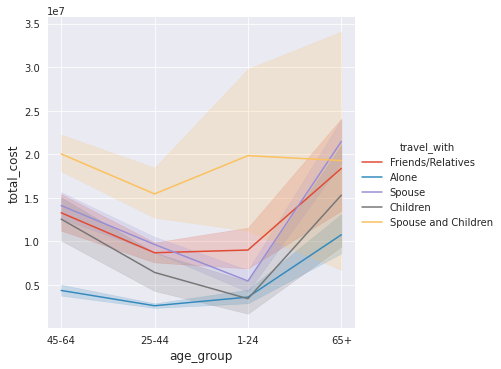

In [58]:
sns.relplot(x="age_group", y="total_cost", hue='travel_with',kind='line', data=train_df)

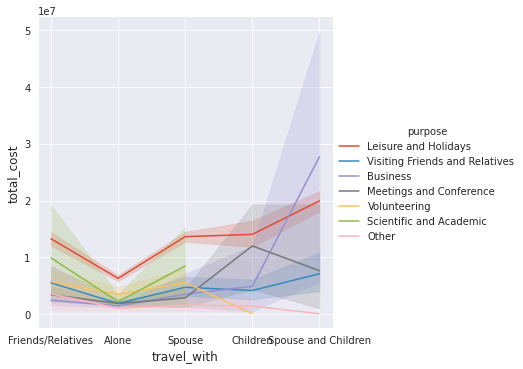

In [59]:
sns.relplot(x="travel_with", y="total_cost", hue='purpose',kind='line', data=train_df)
plt.show()

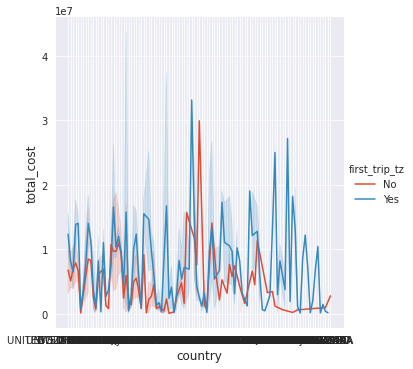

In [60]:
sns.relplot(x="country", y="total_cost", hue='first_trip_tz', kind="line", data=train_df)
plt.show()

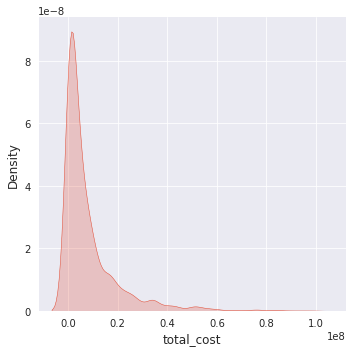

In [61]:
sns.displot(train_df, x="total_cost", kind="kde", fill=True)
plt.show()

### Data Preprocessing

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le = LabelEncoder()
minmax = MinMaxScaler()

print('Done importing..')

Done importing..


In [103]:
#Merging Datasets

dataset = [train_df,test_df]
all_data = pd.concat(dataset)

print("Done merging datasets!!")

Done merging datasets!!


In [105]:
def transform(dataset):
    dtf = dataset
    
    cols = ['country','age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'payment_mode',
       'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 
       'first_trip_tz']
    dtf[cols] = dtf[cols].apply(le.fit_transform)    
    return dtf

In [65]:
cols = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'payment_mode',
       'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 
       'first_trip_tz']
all_data = pd.get_dummies(all_data, columns= cols)

In [106]:
all_data = transform(all_data)

In [107]:
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,train
0,101,2,2,1.0,1.0,1,7,0,0,0,0,0,0,0,0,0,13.0,0.0,0,0,674602.5,1
1,111,1,0,1.0,0.0,1,3,7,0,0,0,0,0,0,0,0,14.0,7.0,0,1,3214906.5,1
2,111,1,0,0.0,1.0,5,3,0,0,0,0,0,0,0,0,0,1.0,31.0,0,0,3315000.0,1
3,111,1,3,1.0,1.0,1,7,5,1,0,1,1,1,1,1,0,11.0,0.0,0,1,7790250.0,1
4,17,0,0,1.0,0.0,1,7,5,0,0,0,0,0,0,0,0,7.0,4.0,0,1,1657500.0,1


In [108]:
colum = ['country','age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'payment_mode',
       'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 
       'first_trip_tz','night_zanzibar','night_mainland']
       
all_data[colum] = minmax.fit_transform(all_data[colum])

In [109]:
all_data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,total_cost,train
0,0.863248,0.666667,0.50,1.0,1.0,0.166667,0.875,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019578,0.000000,0.0,0.0,674602.5,1
1,0.948718,0.333333,0.00,1.0,0.0,0.166667,0.375,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021084,0.040230,0.0,1.0,3214906.5,1
2,0.948718,0.333333,0.00,0.0,1.0,0.833333,0.375,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001506,0.178161,0.0,0.0,3315000.0,1
3,0.948718,0.333333,0.75,1.0,1.0,0.166667,0.875,0.714286,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.016566,0.000000,0.0,1.0,7790250.0,1
4,0.145299,0.000000,0.00,1.0,0.0,0.166667,0.875,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010542,0.022989,0.0,1.0,1657500.0,1


## MODEL BUILDING AND EVALUATION

### Model Building

In [110]:
import re
all_data = all_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [111]:
train_df = all_data[all_data['train']== 1]
test_df = all_data[all_data['train']== 0]

In [112]:
features = train_df.drop(['total_cost','train'], axis=1)
label = train_df.total_cost

In [113]:
features.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz
0,0.863248,0.666667,0.50,1.0,1.0,0.166667,0.875,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019578,0.000000,0.0,0.0
1,0.948718,0.333333,0.00,1.0,0.0,0.166667,0.375,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021084,0.040230,0.0,1.0
2,0.948718,0.333333,0.00,0.0,1.0,0.833333,0.375,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001506,0.178161,0.0,0.0
3,0.948718,0.333333,0.75,1.0,1.0,0.166667,0.875,0.714286,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.016566,0.000000,0.0,1.0
4,0.145299,0.000000,0.00,1.0,0.0,0.166667,0.875,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010542,0.022989,0.0,1.0


In [114]:
label.head()

0     674602.5
1    3214906.5
2    3315000.0
3    7790250.0
4    1657500.0
Name: total_cost, dtype: float64

In [115]:
# Split train data into train and validation dataset

from sklearn.model_selection import train_test_split

x_train,x_val,Y_train,Y_val=train_test_split(features,label,test_size=0.33, random_state=50)

In [116]:
catreg_params = {'iterations' : 2000,
              'learning_rate' : 0.01,
              'loss_function' : 'MAE', 
              'eval_metric' : 'MAE',
              'od_type' : 'Iter', 
              'od_wait' : 30}



catR = CatBoostRegressor(**catreg_params)

eval_set = [(x_val,Y_val)]


In [117]:
lgbmr_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'learning_rate': 0.01,
    "num_leaves": 31,  
    "num_iterations": 1000,
    "n_estimators": 2000
}

lgbmR = LGBMRegressor(**lgbmr_params)

In [118]:
lgbmR.fit(x_train,Y_train,early_stopping_rounds=200,eval_metric='mae',eval_set=eval_set)
pred1 = lgbmR.predict(x_val)

[1]	valid_0's l1: 7.88993e+06	valid_0's l2: 1.4468e+14
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's l1: 7.84861e+06	valid_0's l2: 1.43624e+14
[3]	valid_0's l1: 7.80788e+06	valid_0's l2: 1.42591e+14
[4]	valid_0's l1: 7.7675e+06	valid_0's l2: 1.41565e+14
[5]	valid_0's l1: 7.72779e+06	valid_0's l2: 1.40559e+14
[6]	valid_0's l1: 7.68849e+06	valid_0's l2: 1.39575e+14
[7]	valid_0's l1: 7.6499e+06	valid_0's l2: 1.38613e+14
[8]	valid_0's l1: 7.61158e+06	valid_0's l2: 1.37649e+14
[9]	valid_0's l1: 7.57411e+06	valid_0's l2: 1.36725e+14
[10]	valid_0's l1: 7.53737e+06	valid_0's l2: 1.3582e+14
[11]	valid_0's l1: 7.50104e+06	valid_0's l2: 1.34935e+14
[12]	valid_0's l1: 7.46531e+06	valid_0's l2: 1.34054e+14
[13]	valid_0's l1: 7.43046e+06	valid_0's l2: 1.33191e+14
[14]	valid_0's l1: 7.39539e+06	valid_0's l2: 1.32282e+14
[15]	valid_0's l1: 7.36104e+06	valid_0's l2: 1.31451e+14
[16]	valid_0's l1: 7.32793e+06	valid_0's l2: 1.30654e+14
[17]	valid_0's l1: 7.29439e+06	valid_0

In [119]:
catR.fit(x_train,Y_train,eval_set=eval_set)
pred2 = catR.predict(x_val)

0:	learn: 6924635.8834379	test: 7047361.8538575	best: 7047361.8538575 (0)	total: 48.9ms	remaining: 1m 37s
1:	learn: 6896238.2292264	test: 7016902.9518772	best: 7016902.9518772 (1)	total: 51ms	remaining: 51s
2:	learn: 6864336.9308617	test: 6983999.1747888	best: 6983999.1747888 (2)	total: 53ms	remaining: 35.3s
3:	learn: 6832906.1144232	test: 6951244.1836646	best: 6951244.1836646 (3)	total: 55ms	remaining: 27.5s
4:	learn: 6803222.2205160	test: 6921236.8141593	best: 6921236.8141593 (4)	total: 57ms	remaining: 22.8s
5:	learn: 6780811.3374573	test: 6897611.5787091	best: 6897611.5787091 (5)	total: 59ms	remaining: 19.6s
6:	learn: 6751301.0119783	test: 6867102.8331399	best: 6867102.8331399 (6)	total: 61ms	remaining: 17.4s
7:	learn: 6724084.6646848	test: 6839435.3816775	best: 6839435.3816775 (7)	total: 63ms	remaining: 15.7s
8:	learn: 6697803.5772626	test: 6812631.7629347	best: 6812631.7629347 (8)	total: 65ms	remaining: 14.4s
9:	learn: 6673122.4428282	test: 6787486.4760982	best: 6787486.4760982 (9

In [120]:
xgb_reg = XGBRegressor(learning_rate=0.01, n_estimators=100)
xgb_reg.fit(x_train,Y_train)
xgb_pred = xgb_reg.predict(x_val)

[16:15:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Model Evaluation

In [121]:
def pred_accuracy (model):
    mae = mean_absolute_error(Y_val,model)
    print(f"MAE is {mae}")

In [122]:
pred_accuracy(pred1)

MAE is 4966748.653548462


In [123]:
pred_accuracy(pred2)

MAE is 4695796.115872135


In [124]:
pred_accuracy(xgb_pred)

MAE is 5157041.0022835545


## MODEL PREDICTION

### Prediction

Three (3) models using LightGBMRegression,CatBoostRegression and XGBRegression were built and evaluated.

CatBoostRegression was the best model with the lowest MAE of 4,635,852.

In [125]:
test_df = test_df.drop(['train'], axis=1)

In [126]:
catR.fit(features,label)
label_pred = catR.predict(test_df)

0:	learn: 6964815.0343098	total: 3ms	remaining: 6s
1:	learn: 6933162.1996542	total: 5.43ms	remaining: 5.43s
2:	learn: 6900079.3500365	total: 10.4ms	remaining: 6.91s
3:	learn: 6870079.2084055	total: 13.8ms	remaining: 6.86s
4:	learn: 6839593.4415677	total: 16.7ms	remaining: 6.64s
5:	learn: 6812908.4705022	total: 19.5ms	remaining: 6.48s
6:	learn: 6782896.0614129	total: 22.8ms	remaining: 6.48s
7:	learn: 6755423.7019327	total: 25.2ms	remaining: 6.28s
8:	learn: 6729060.4770620	total: 27.9ms	remaining: 6.18s
9:	learn: 6703605.3675858	total: 30.5ms	remaining: 6.06s
10:	learn: 6676577.8768158	total: 33.2ms	remaining: 6.01s
11:	learn: 6650857.2934527	total: 36.1ms	remaining: 5.99s
12:	learn: 6626325.1901570	total: 38.5ms	remaining: 5.89s
13:	learn: 6601853.7773966	total: 41ms	remaining: 5.81s
14:	learn: 6575910.3809415	total: 43.4ms	remaining: 5.74s
15:	learn: 6550698.0703563	total: 46.1ms	remaining: 5.72s
16:	learn: 6528746.8243154	total: 48.6ms	remaining: 5.66s
17:	learn: 6503752.6073473	total

### Submission

In [128]:
from google.colab import files

final_sub = pd.DataFrame({'test_ID':test.ID,
                          'total_cost': label_pred})
final_sub.to_csv('subTanz_2.csv', index = False)

files.download('subTanz_2.csv')
print('Submission successfully saved...')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Submission successfully saved...


### Saving Model